In [41]:
import pandas as pd
import os
from datetime import datetime
from dataretrieval import nwis
import matplotlib.pyplot as plt
import pytz


### In this note book we will:
- Extract the flow at the nearest USGS gage from the date of each flowtracker measurement
- Get the proportion of our measured flow to the flow at the USGS gage at the same time
- Apply that proportion to the time period we want to model, to adjust boundary and tributary flows.

In [80]:
#reading in data with relative paths so that it can be used by others who clone repository from github
script_dir = os.getcwd()

#flowtracker Observations
flowtracker_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'observations','FlowTrackerObs', 'FlowtrackerMaster2023.csv'))


#read flowtracker data
flowtracker = pd.read_csv(flowtracker_path)
# flowtracker.index = flowtracker['Name']
flowtracker.set_index('Name', drop=True, inplace=True)
# July calibration Files
july_hsfiles_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'calibration','July'))

# June calibration Files
june_hsfiles_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'calibration','June'))

# August calibration Files
august_hsfiles_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'calibration','August'))



In [81]:
flowtracker

,Lat,Lon,Name.1,Datetime,Width,Area,Discharge,discharge_uncertaintyIVE_perc,Depth,Velocity,velocity_uncertaintyIVE_perc
Name,,,,,,,,,,,
Sb_conf,43.595100,-90.782040,Sb.conf,6/23/2023 11:39,4.43,0.747,0.2740,7.384,0.169,0.367,6.700
Sb_crumedown,43.604770,-90.834870,Sb.crumedown,6/27/2023 11:56,4.54,0.719,0.0980,19.236,0.158,0.137,18.852
Sb_crumetrib,43.603910,-90.837360,Sb.crumetrib,6/27/2023 12:56,2.50,0.302,0.0730,6.633,0.121,0.242,4.727
Sb_crumeup,43.603050,-90.839470,Sb.crumeup,6/27/2023 13:55,3.40,0.602,0.0520,5.891,0.177,0.086,5.298
Sb_thdown,43.606780,-90.808920,Sb.thdown,6/13/2023 14:15,5.40,1.245,0.2260,7.174,0.231,0.182,6.280
Sb_thtrib,43.609738,-90.812206,Sb.thtrib,6/13/2023 13:05,1.30,0.073,0.0050,60.032,0.056,0.069,58.554
SB_thup,43.610060,-90.813530,SB.thup,6/13/2023 11:59,4.80,1.023,0.2100,6.459,0.213,0.206,5.753
WF_sportsclubDOWN,43.596940,-90.780300,Wfsc.down2,6/23/2023 12:39,6.42,1.124,0.6940,4.838,0.175,0.617,3.834
Wfsc_down,43.596940,-90.780300,Wfsc.down,6/15/2023 6:49,7.75,1.721,0.9780,5.104,0.222,0.568,4.439


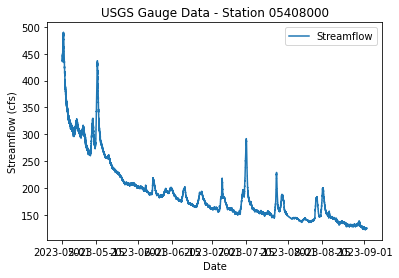

In [89]:

# Specify the USGS gauge station code and the period of interest
station_code = '05408000'  # Replace with the actual code of the gauge station you are interested in
start_date = '2023-05-01'
end_date = '2023-09-01'
timestamp_format = '%m/%d/%Y %H:%M'

# Use the nwis class to retrieve daily streamflow data for the specified station
data = nwis.get_record(sites=station_code, service='iv', start=start_date, end=end_date, parameterCd='00060')
data.index = pd.to_datetime(data.index, format=timestamp_format)#.tz_localize(None)

# Plot the streamflow data
plt.plot(data.index, data['00060'], label='Streamflow')
plt.xlabel('Date')
plt.ylabel('Streamflow (cfs)')
plt.title(f'USGS Gauge Data - Station {station_code}')
plt.legend()
plt.show()


### Get the file names for each tributary file and the boundary file, in order to adjust flows

In [5]:
#listing trib files to apply corrections
import os

def get_files(folder_path):
    # Initialize an empty list to store file names
    file_names = []
    
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        #print(f"Checking file: {filename}")

        # Check if the filename contains 'trib'
        if ('trib' in filename or 'boundary' in filename) and 'accretion' not in filename:
            # Add the filename to the list
            print(f"Adding file: {filename}")

            file_names.append(filename)
    return file_names


In [ ]:
# July function usage
july_folder_path = os.path.join(july_hsfiles_path, 'inputs')
july_file_names = get_files(july_folder_path)
print(file_names)

In [9]:
# June function usage
june_folder_path = os.path.join(june_hsfiles_path, 'inputs')
june_file_names = get_files(june_folder_path)
print(june_file_names)

Adding file: bloomtrib.csv
Adding file: boydtrib.csv
Adding file: halltrib.csv
Adding file: hayestrib.csv
Adding file: hwy82downtrib.csv
Adding file: hwy82uptrib.csv
Adding file: mayertrib.csv
Adding file: riverrdtrib.csv
Adding file: rockyruntrib.csv
Adding file: seasbranchtrib.csv
Adding file: smarthallowtrib.csv
Adding file: thnorthtrib.csv
Adding file: WFK23_boundary.csv
Adding file: yodertrib.csv
['bloomtrib.csv', 'boydtrib.csv', 'halltrib.csv', 'hayestrib.csv', 'hwy82downtrib.csv', 'hwy82uptrib.csv', 'mayertrib.csv', 'riverrdtrib.csv', 'rockyruntrib.csv', 'seasbranchtrib.csv', 'smarthallowtrib.csv', 'thnorthtrib.csv', 'WFK23_boundary.csv', 'yodertrib.csv']


In [55]:
# August function usage
august_folder_path = os.path.join(august_hsfiles_path, 'inputs')
august_file_names = get_files(august_folder_path)
print(august_file_names)

Adding file: bloomtrib.csv
Adding file: boydtrib.csv
Adding file: halltrib.csv
Adding file: hayestrib.csv
Adding file: hwy82downtrib.csv
Adding file: hwy82uptrib.csv
Adding file: mayertrib.csv
Adding file: riverrdtrib.csv
Adding file: rockyruntrib.csv
Adding file: seasbranchtrib.csv
Adding file: smarthallowtrib.csv
Adding file: thnorthtrib.csv
Adding file: WFK23_boundary.csv
Adding file: yodertrib.csv
['bloomtrib.csv', 'boydtrib.csv', 'halltrib.csv', 'hayestrib.csv', 'hwy82downtrib.csv', 'hwy82uptrib.csv', 'mayertrib.csv', 'riverrdtrib.csv', 'rockyruntrib.csv', 'seasbranchtrib.csv', 'smarthallowtrib.csv', 'thnorthtrib.csv', 'WFK23_boundary.csv', 'yodertrib.csv']


### Make a dictionary that links the name of each flowtracker measurement with the correspondiing heatsource file

In [56]:
# This dictionary ties the name of each flow file to the flowtracker measurement name
trib_dict = {'WFK23_boundary': 'WF_hayesUP', 'bloomtrib': 'Wf_bloomtrib', 'boydtrib': 'Wf_boydtrib', 'halltrib': 'Wf_haLl', 'hayestrib':'Wf_hayes_trib',
             'hwy82downtrib':'WF_hwy82tribDOWN',  'hwy82uptrib':'Wf_hwy82tribup', 'mayertrib': 'Wf_mayertrib', 'riverrdtrib': 'Wf_riverrd_trib',
             'rockyruntrib':'Wf_rockyrun', 'seasbranchtrib': 'Sb_conf', 'smarthallowtrib': 'Wf_smrthlw_trb', 'thnorthtrib':'Wf_thnorth_trib',
             'yodertrib':'WF_yodertrib'}

### Correcting each flow file based on the proportion of flow between flowtracker measurment and LaFarge USGS flow gage, writing to csv in heatsource file folder

In [98]:
# Iterate over each file name in the file_names list
for i in august_file_names:
    # Create the full file path for the current file
    file = os.path.join(august_hsfiles_path,'inputs', i)
    # Remove the last 4 characters from the file name (usually the file extension)
    name = i[:-4]
    # Read the CSV file into a pandas DataFrame
    csv = pd.read_csv(file)
    # Convert the 'DATETIME' column to datetime and set it as the DataFrame index
    csv.index = pd.to_datetime(csv['DATETIME'])
    # Get the flowtracker measurement name from trib_dict using the current name
    flowtracker_measurment_name = trib_dict[name]
    # Print the flowtracker measurement name
    print(flowtracker_measurment_name)
    # Get the index of the row with the matching name in the flowtracker DataFrame
    row_index = flowtracker.loc[flowtracker.index == flowtracker_measurment_name].index[0]
    # Get the measured flow value from the flowtracker DataFrame
    measured_flow = flowtracker.at[row_index, 'Discharge']
    # Print the measured flow value
    print('flowtracker cms: ' + str(measured_flow))
    # Get the flow date from the flowtracker DataFrame
    flow_date = flowtracker.at[row_index, 'Datetime']
    timestamp = pd.to_datetime(flow_date, format='%m/%d/%Y %H:%M')#.tz_localize(None)
    rounded_timestamp = timestamp.round('H')


   # flow_date = pd.to_datetime(flow_date, format='%m/%d/%Y %H:%M')

    # Print the flow date
    print('flowtracker date: ' + str(rounded_timestamp))
    # Convert the flow rate at a specific time to cubic meters per second
    lafarge_cms = data.loc[str(rounded_timestamp)]['00060'] * .028316847
    # Print the converted flow rate
    print('Lafarge Gage cms: ' + str(lafarge_cms))
    # Calculate the proportion of measured flow to the Lafarge Gage flow rate
    proportion = measured_flow / lafarge_cms
    # Resample the data to daily mean values and convert to cubic meters per second
    daily_mean_cms = pd.DataFrame(data['00060'].resample('D').mean() * .028316847)
    # Apply the proportion to get the corrected flow
    daily_mean_cms['corrected_flow'] = daily_mean_cms['00060'] * proportion

    # Resample to hourly data and forward-fill missing values
    daily_mean_cms = daily_mean_cms.resample('H').ffill()
    # Change things so that timezone information lines up and is compatible
    if daily_mean_cms.index.tz is None:
        # Localize the daily_mean_cms index to no timezone
        daily_mean_cms.index = daily_mean_cms.index.tz_localize(None)
    else:
        # Convert the daily_mean_cms index to the boundary file's timezone
        daily_mean_cms.index = daily_mean_cms.index.tz_convert(csv.index.tz)

    # Join the summer long boundary condition file with the heatsoure time period
    result = csv.merge(daily_mean_cms, how='left', left_index=True, right_index=True)
    if 'FLOW1' in csv.columns:
        csv.drop(columns=['FLOW1'], inplace=True)
    # Make the discharge in the boundary condition csv equal the corrected flows which we determined earlier with the USGS gage
    if 'boundary' in i:
        csv['INFLOW'] = result['corrected_flow']
    else:
        #csv.drop(columns = ['FLOW1'], inplace = True)
        csv['FLOW1'] = result['corrected_flow']
    # Print the first 10 rows of the updated csv DataFrame
    columns = list(csv.columns)
    # need to make sure columns are in the correct order, was getting an error from heatsource otherwise
    if 'FLOW1' in columns and 'TEMPERATURE1' in columns:
        columns.insert(columns.index('TEMPERATURE1'), columns.pop(columns.index('FLOW1')))
        csv = csv[columns]
    print(csv.head(10))
    # Save the updated csv DataFrame back to the file without writing the index
    csv.to_csv(file, index=False)


Wf_bloomtrib
flowtracker cms: 0.001
flowtracker date: 2023-06-28 12:00:00
Lafarge Gage cms: 4.81386399
                          DATETIME     FLOW1  TEMPERATURE1
DATETIME                                                  
2023-08-01 00:00:00  8/1/2023 0:00  0.000862     13.197221
2023-08-01 01:00:00  8/1/2023 1:00  0.000862     13.013661
2023-08-01 02:00:00  8/1/2023 2:00  0.000862     12.853105
2023-08-01 03:00:00  8/1/2023 3:00  0.000862     12.703573
2023-08-01 04:00:00  8/1/2023 4:00  0.000862     12.531036
2023-08-01 05:00:00  8/1/2023 5:00  0.000862     12.404030
2023-08-01 06:00:00  8/1/2023 6:00  0.000862     12.277023
2023-08-01 07:00:00  8/1/2023 7:00  0.000862     12.184524
2023-08-01 08:00:00  8/1/2023 8:00  0.000862     12.254018
2023-08-01 09:00:00  8/1/2023 9:00  0.000862     12.484547
Wf_boydtrib
flowtracker cms: 0.042
flowtracker date: 2023-06-22 15:00:00
Lafarge Gage cms: 4.785547143
                          DATETIME     FLOW1  TEMPERATURE1
DATETIME                   

In [91]:
csv

,DATETIME,FLOW1,TEMPERATURE1
DATETIME,,,
2023-08-01 00:00:00,8/1/2023 0:00,0.027642,14.189881
2023-08-01 01:00:00,8/1/2023 1:00,0.027642,13.931010
2023-08-01 02:00:00,8/1/2023 2:00,0.027642,13.717470
2023-08-01 03:00:00,8/1/2023 3:00,0.027642,13.538658
2023-08-01 04:00:00,8/1/2023 4:00,0.027642,13.402908
...,...,...,...
2023-08-05 20:00:00,8/5/2023 20:00,0.026557,15.759669
2023-08-05 21:00:00,8/5/2023 21:00,0.026557,15.520754
2023-08-05 22:00:00,8/5/2023 22:00,0.026557,15.218048
